# Limpieza del conjunto de datos y selección de variables mediante XGBOOST

Este conjunto de datos ha sido descargado de  Kaggle https://www.kaggle.com/karangadiya/fifa19. Licencia: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

##1-Importamos librerías y montamos drive

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2-Establecemos la rutas referentes al conjunto de datos sin preprocesar y dónde guardaremos los atributos y la variable a predecir

In [2]:
INPUT_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1.1/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1.1/Preprocesado/atributosXGBoost.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1.1/Preprocesado/etiquetasXGBoost.csv"

##3-Vemos la forma del conjunto de datos, el nombre de la columna y el tipo de dato

In [3]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

##4-Comenzamos el preprocesado

**4.1:** Eliminamos columnas que no aporten gran información, como la foto del jugador (hemos decidido añadir los atributos age, value, potential)

In [4]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Name'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Photo':'Flag'].columns, inplace=True, axis = 1)

#dataset.drop(dataset.loc[:, 'Potential':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Club':'Club Logo'].columns, inplace=True, axis = 1)


dataset.drop(dataset.loc[:, 'Wage':'International Reputation'].columns, inplace=True, axis = 1)


dataset.drop(dataset.loc[:, 'Weak Foot':'Real Face'].columns, inplace=True, axis = 1)

dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)


dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

**4.2-**Transformamos los string de la columna value a números

In [5]:
dataset['Value'] = dataset['Value'].str[1:]
dataset.Value = (dataset.Value.replace(r'[KM]+$', '', regex=True).astype(float) * \
           dataset.Value.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**3, 10**6]).astype(int))
dataset['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

**4.3-**Eliminamos a los porteros, ya que tienen otro conjunto de características asociadas.

In [6]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

**4.4-** Mostramos el número de datos nulos por columna

In [7]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Acceleration': 48,
 'Age': 0,
 'Aggression': 48,
 'Agility': 48,
 'Balance': 48,
 'BallControl': 48,
 'Composure': 48,
 'Crossing': 48,
 'Curve': 48,
 'Dribbling': 48,
 'FKAccuracy': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'Interceptions': 48,
 'Jumping': 48,
 'LongPassing': 48,
 'LongShots': 48,
 'Marking': 48,
 'Overall': 0,
 'Penalties': 48,
 'Position': 60,
 'Positioning': 48,
 'Potential': 0,
 'Reactions': 48,
 'ShortPassing': 48,
 'ShotPower': 48,
 'SlidingTackle': 48,
 'SprintSpeed': 48,
 'Stamina': 48,
 'StandingTackle': 48,
 'Strength': 48,
 'Value': 0,
 'Vision': 48,
 'Volleys': 48}

**4.5-**Dado que tenemos un amplio conjunto de datos y en relación los datos nulos son pocos, los eliminamos.

In [8]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Acceleration': 0,
 'Age': 0,
 'Aggression': 0,
 'Agility': 0,
 'Balance': 0,
 'BallControl': 0,
 'Composure': 0,
 'Crossing': 0,
 'Curve': 0,
 'Dribbling': 0,
 'FKAccuracy': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'Interceptions': 0,
 'Jumping': 0,
 'LongPassing': 0,
 'LongShots': 0,
 'Marking': 0,
 'Overall': 0,
 'Penalties': 0,
 'Position': 0,
 'Positioning': 0,
 'Potential': 0,
 'Reactions': 0,
 'ShortPassing': 0,
 'ShotPower': 0,
 'SlidingTackle': 0,
 'SprintSpeed': 0,
 'Stamina': 0,
 'StandingTackle': 0,
 'Strength': 0,
 'Value': 0,
 'Vision': 0,
 'Volleys': 0}

**4.6-**Vemos como ha quedado por ahora nuestro conjunto de datos

In [9]:
dataset.shape, dataset.columns

((16122, 34),
 Index(['Age', 'Overall', 'Potential', 'Value', 'Position', 'Crossing',
        'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
        'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
        'Marking', 'StandingTackle', 'SlidingTackle'],
       dtype='object'))

**4.7-**Creamos una matriz de correlación para después quedarnos con los atributos más correlacionados con la variable a predecir 'Overall'


La **matriz de correlación** permite visualizar las dependencias entre pares de atributos: los valores cercanos a -1 o +1 indican una alta correlación. Un valor de correlación negativo significa que cuando el valor de un atributo aumenta, el valor del otro atributo disminuye, y viceversa. Los valores de correlación positivos señalan que ambos atributos aumentan o disminuyen simultáneamente. 

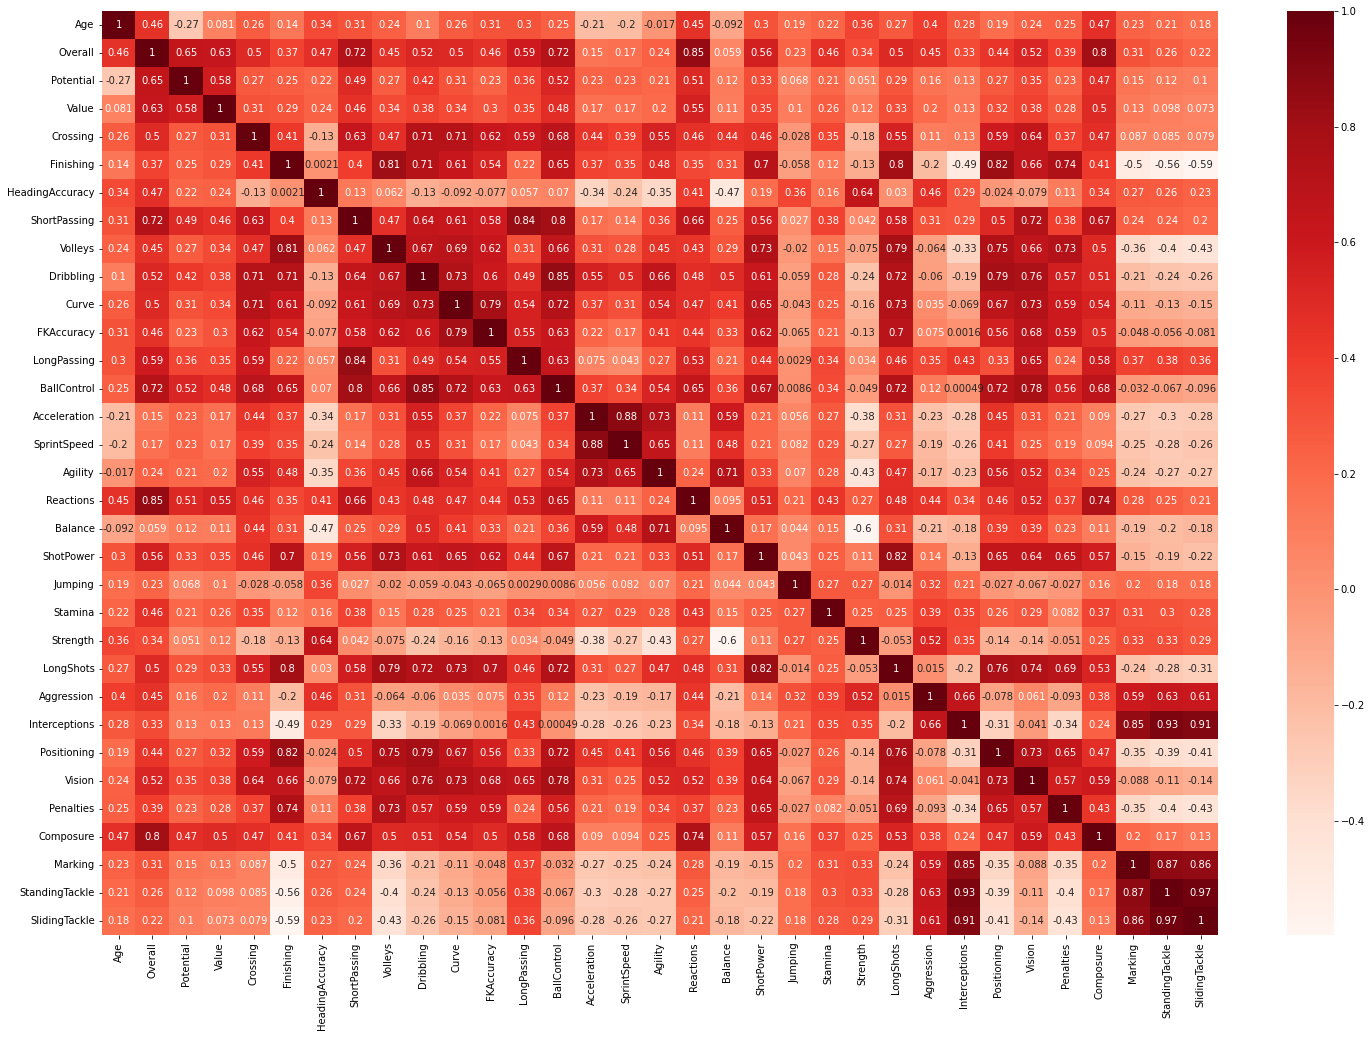

In [10]:
import seaborn as sns
plt.figure(figsize=(25,17))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**4.8-**Seleccionamos atributos con >0.4 de correlación con la variable 'Overall' y lo ordenamos de más a menos correlacionado

In [12]:
cor_target = abs(cor["Overall"])
relevant_features = cor_target[cor_target>=0.4]
df_cor = pd.DataFrame(relevant_features).sort_values(by='Overall', ascending=False)
df_cor.to_excel('/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1.1/Preprocesado/Excel_memoria/XGBoost.xlsx')

In [13]:
df_cor

,Overall
Overall,1.000000
Reactions,0.847739
Composure,0.801749
ShortPassing,0.722720
BallControl,0.717933
Potential,0.650382
Value,0.634785
LongPassing,0.585104
ShotPower,0.562960
Vision,0.524361


In [ ]:
features_names = relevant_features.index
features_names = features_names.drop('Overall')
features_names

Index(['Reactions', 'Composure', 'ShortPassing', 'BallControl', 'Potential',
       'Value', 'LongPassing', 'ShotPower', 'Vision', 'Dribbling', 'Curve',
       'LongShots', 'Crossing', 'HeadingAccuracy', 'Stamina', 'FKAccuracy',
       'Age', 'Aggression', 'Volleys', 'Positioning'],
      dtype='object')

In [15]:
dataset_preprocesado = dataset[relevant_features.index]
dataset_preprocesado

,Age,Overall,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,31,94,94,110500000.0,84.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,95.0,85.0,72.0,94.0,48.0,94.0,94.0,96.0
1,33,94,94,77000000.0,84.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,96.0,95.0,88.0,93.0,63.0,95.0,82.0,95.0
2,26,92,93,118500000.0,79.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,80.0,81.0,82.0,56.0,89.0,87.0,94.0
4,27,91,92,102000000.0,93.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,91.0,91.0,90.0,91.0,76.0,87.0,94.0,88.0
5,27,91,91,93000000.0,81.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,90.0,82.0,83.0,80.0,54.0,87.0,89.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,60000.0,34.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,49.0,43.0,40.0,38.0,46.0,39.0,52.0,45.0
18203,19,47,63,60000.0,23.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,40.0,41.0,43.0,42.0,47.0,46.0,33.0,42.0
18204,16,47,67,60000.0,25.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,47.0,45.0,55.0,45.0,32.0,48.0,43.0,41.0
18205,17,47,66,60000.0,44.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,21.0,64.0,40.0,34.0,33.0,44.0,47.0,46.0


**4.9-** Mezclamos el conjunto de datos tres veces.

In [16]:
dataset_preprocesado=dataset_preprocesado.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset_preprocesado=dataset_preprocesado.sample(frac=1)
dataset_preprocesado=dataset_preprocesado.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset_preprocesado.head()

,Age,Overall,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,29,69,69,0.0,48.0,65.0,66.0,42.0,63.0,45.0,48.0,66.0,65.0,66.0,59.0,83.0,40.0,79.0,58.0,60.0,65.0
1,27,63,64,350000.0,63.0,48.0,61.0,36.0,51.0,29.0,19.0,55.0,59.0,52.0,62.0,75.0,40.0,62.0,52.0,45.0,63.0
2,25,75,80,7500000.0,45.0,65.0,76.0,29.0,65.0,34.0,32.0,73.0,68.0,76.0,75.0,77.0,62.0,80.0,42.0,65.0,67.0
3,23,73,81,5000000.0,42.0,72.0,65.0,61.0,55.0,45.0,31.0,68.0,66.0,66.0,67.0,72.0,29.0,65.0,32.0,46.0,72.0
4,21,72,81,4100000.0,72.0,59.0,73.0,48.0,69.0,62.0,35.0,56.0,73.0,69.0,60.0,62.0,42.0,69.0,51.0,53.0,63.0


##**5.0-** El problema consiste en clasificar a los futbolistas en función de su puntuación global (calidad) en cuatro categorías: Mala, Intermedia, Buena y Excelente.
Para realizar esta tarea utilizamos una función de discretización basada en la cuantía.  

In [17]:
labels = pd.qcut(dataset_preprocesado["Overall"],4,labels=False)

In [18]:
dataset_preprocesado.insert (1,"Quality",labels)
dataset_preprocesado[:10]

,Age,Quality,Overall,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,29,2,69,69,0.0,48.0,65.0,66.0,42.0,63.0,45.0,48.0,66.0,65.0,66.0,59.0,83.0,40.0,79.0,58.0,60.0,65.0
1,27,1,63,64,350000.0,63.0,48.0,61.0,36.0,51.0,29.0,19.0,55.0,59.0,52.0,62.0,75.0,40.0,62.0,52.0,45.0,63.0
2,25,3,75,80,7500000.0,45.0,65.0,76.0,29.0,65.0,34.0,32.0,73.0,68.0,76.0,75.0,77.0,62.0,80.0,42.0,65.0,67.0
3,23,3,73,81,5000000.0,42.0,72.0,65.0,61.0,55.0,45.0,31.0,68.0,66.0,66.0,67.0,72.0,29.0,65.0,32.0,46.0,72.0
4,21,3,72,81,4100000.0,72.0,59.0,73.0,48.0,69.0,62.0,35.0,56.0,73.0,69.0,60.0,62.0,42.0,69.0,51.0,53.0,63.0
5,19,1,64,79,875000.0,28.0,69.0,66.0,33.0,40.0,32.0,20.0,35.0,48.0,62.0,31.0,68.0,30.0,50.0,20.0,36.0,55.0
6,30,3,78,78,9500000.0,83.0,58.0,77.0,82.0,80.0,88.0,82.0,78.0,80.0,76.0,78.0,92.0,78.0,76.0,70.0,77.0,78.0
7,23,1,63,71,475000.0,28.0,68.0,57.0,28.0,46.0,30.0,26.0,56.0,56.0,49.0,42.0,59.0,22.0,68.0,31.0,36.0,58.0
8,28,3,76,76,8000000.0,66.0,78.0,70.0,72.0,74.0,60.0,56.0,63.0,77.0,76.0,81.0,77.0,67.0,87.0,79.0,70.0,78.0
9,23,1,64,70,625000.0,62.0,33.0,56.0,56.0,66.0,61.0,45.0,53.0,62.0,54.0,63.0,67.0,63.0,33.0,54.0,50.0,55.0


**5.1-**Calculamos los intervalos de *Overall* para cada etiqueta.

In [19]:
intervals={label : [(dataset_preprocesado.loc[dataset_preprocesado["Quality"]==label].min()["Overall"]),
                    (dataset_preprocesado.loc[dataset_preprocesado["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

**5.2-**Mostramos el número de instancias por etiqueta, el cual debe ser equilibrado.

In [20]:
dataset_preprocesado["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [21]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [22]:
dataset_preprocesado.drop(columns="Overall", inplace=True)
dataset_preprocesado[:10]

,Age,Quality,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,29,2,69,0.0,48.0,65.0,66.0,42.0,63.0,45.0,48.0,66.0,65.0,66.0,59.0,83.0,40.0,79.0,58.0,60.0,65.0
1,27,1,64,350000.0,63.0,48.0,61.0,36.0,51.0,29.0,19.0,55.0,59.0,52.0,62.0,75.0,40.0,62.0,52.0,45.0,63.0
2,25,3,80,7500000.0,45.0,65.0,76.0,29.0,65.0,34.0,32.0,73.0,68.0,76.0,75.0,77.0,62.0,80.0,42.0,65.0,67.0
3,23,3,81,5000000.0,42.0,72.0,65.0,61.0,55.0,45.0,31.0,68.0,66.0,66.0,67.0,72.0,29.0,65.0,32.0,46.0,72.0
4,21,3,81,4100000.0,72.0,59.0,73.0,48.0,69.0,62.0,35.0,56.0,73.0,69.0,60.0,62.0,42.0,69.0,51.0,53.0,63.0
5,19,1,79,875000.0,28.0,69.0,66.0,33.0,40.0,32.0,20.0,35.0,48.0,62.0,31.0,68.0,30.0,50.0,20.0,36.0,55.0
6,30,3,78,9500000.0,83.0,58.0,77.0,82.0,80.0,88.0,82.0,78.0,80.0,76.0,78.0,92.0,78.0,76.0,70.0,77.0,78.0
7,23,1,71,475000.0,28.0,68.0,57.0,28.0,46.0,30.0,26.0,56.0,56.0,49.0,42.0,59.0,22.0,68.0,31.0,36.0,58.0
8,28,3,76,8000000.0,66.0,78.0,70.0,72.0,74.0,60.0,56.0,63.0,77.0,76.0,81.0,77.0,67.0,87.0,79.0,70.0,78.0
9,23,1,70,625000.0,62.0,33.0,56.0,56.0,66.0,61.0,45.0,53.0,62.0,54.0,63.0,67.0,63.0,33.0,54.0,50.0,55.0


**5.3-** Dividimos el conjunto de datos verticalmente en atributos seleccionados $x$ y etiquetas $t$ para el aprendizaje supervisado.

In [23]:
discretized_t = pd.DataFrame(data=dataset_preprocesado["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,2
1,1
2,3
3,3
4,3
5,1
6,3
7,1
8,3
9,1


In [24]:
x = dataset_preprocesado.drop (columns="Quality")
x.head()

,Age,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,29,69,0.0,48.0,65.0,66.0,42.0,63.0,45.0,48.0,66.0,65.0,66.0,59.0,83.0,40.0,79.0,58.0,60.0,65.0
1,27,64,350000.0,63.0,48.0,61.0,36.0,51.0,29.0,19.0,55.0,59.0,52.0,62.0,75.0,40.0,62.0,52.0,45.0,63.0
2,25,80,7500000.0,45.0,65.0,76.0,29.0,65.0,34.0,32.0,73.0,68.0,76.0,75.0,77.0,62.0,80.0,42.0,65.0,67.0
3,23,81,5000000.0,42.0,72.0,65.0,61.0,55.0,45.0,31.0,68.0,66.0,66.0,67.0,72.0,29.0,65.0,32.0,46.0,72.0
4,21,81,4100000.0,72.0,59.0,73.0,48.0,69.0,62.0,35.0,56.0,73.0,69.0,60.0,62.0,42.0,69.0,51.0,53.0,63.0


**5.4-** Aplicamos one-hot encoding sobre la variable objetivo (etiqueta)

In [25]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [26]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0


**5.5-** Aplicamos estandarización o normalización del conjunto de datos de entrada. *La normalización se ve mucho menos afectada por los valores atípicos, pero no limita los valores a un rango específico, lo que puede ser un problema para las redes neuronales. El centro es la media, y los datos se escalan a la unidad de varianza. Por otro lado, el *escalado máximo-mínimo* sitúa los datos dentro de los valores máximo y mínimo, normalmente -1, y 1 o \[0,1\].  

In [27]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Age,Potential,Value,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,0.04,-0.106383,-1.000000,-0.097561,0.265823,0.260274,-0.200,0.180723,-0.180723,-0.095238,0.270270,0.126761,0.200000,0.111111,0.623188,-0.301205,0.609756,0.119048,0.170732,0.162162
1,-0.12,-0.319149,-0.994093,0.268293,-0.164557,0.123288,-0.350,-0.108434,-0.566265,-0.785714,-0.027027,-0.042254,-0.173333,0.185185,0.391304,-0.301205,0.195122,-0.023810,-0.195122,0.108108
2,-0.28,0.361702,-0.873418,-0.170732,0.265823,0.534247,-0.525,0.228916,-0.445783,-0.476190,0.459459,0.211268,0.466667,0.506173,0.449275,0.228916,0.634146,-0.261905,0.292683,0.216216
3,-0.44,0.404255,-0.915612,-0.243902,0.443038,0.232877,0.275,-0.012048,-0.180723,-0.500000,0.324324,0.154930,0.200000,0.308642,0.304348,-0.566265,0.268293,-0.500000,-0.170732,0.351351
4,-0.60,0.404255,-0.930802,0.487805,0.113924,0.452055,-0.050,0.325301,0.228916,-0.404762,0.000000,0.352113,0.280000,0.135802,0.014493,-0.253012,0.365854,-0.047619,0.000000,0.108108
5,-0.76,0.319149,-0.985232,-0.585366,0.367089,0.260274,-0.425,-0.373494,-0.493976,-0.761905,-0.567568,-0.352113,0.093333,-0.580247,0.188406,-0.542169,-0.097561,-0.785714,-0.414634,-0.108108
6,0.12,0.276596,-0.839662,0.756098,0.088608,0.561644,0.800,0.590361,0.855422,0.714286,0.594595,0.549296,0.466667,0.580247,0.884058,0.614458,0.536585,0.404762,0.585366,0.513514
7,-0.44,-0.021277,-0.991983,-0.585366,0.341772,0.013699,-0.550,-0.228916,-0.542169,-0.619048,0.000000,-0.126761,-0.253333,-0.308642,-0.072464,-0.734940,0.341463,-0.523810,-0.414634,-0.027027
8,-0.04,0.191489,-0.864979,0.341463,0.594937,0.369863,0.550,0.445783,0.180723,0.095238,0.189189,0.464789,0.466667,0.654321,0.449275,0.349398,0.804878,0.619048,0.414634,0.513514
9,-0.44,-0.063830,-0.989451,0.243902,-0.544304,-0.013699,0.150,0.253012,0.204819,-0.166667,-0.081081,0.042254,-0.120000,0.209877,0.159420,0.253012,-0.512195,0.023810,-0.073171,-0.108108


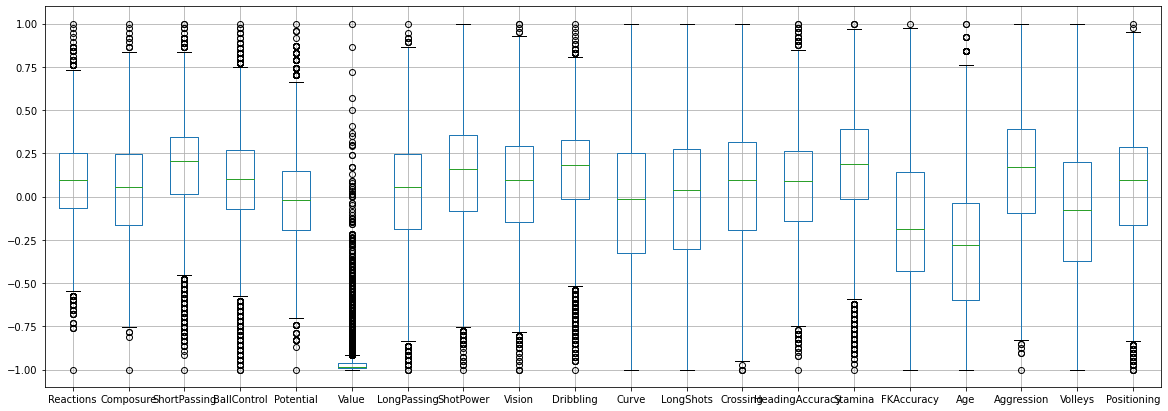

In [ ]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

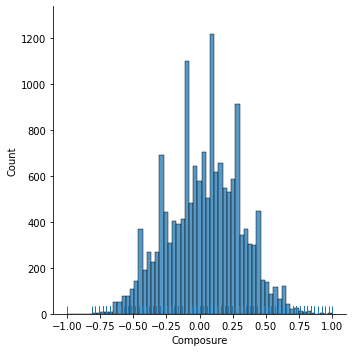

In [ ]:
sns.displot(x["Composure"],kde=False,rug=True)

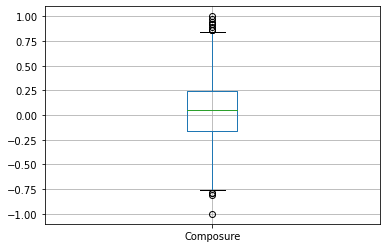

In [ ]:
x.boxplot(column=["Composure"])

In [ ]:
x.describe()

,Reactions,Composure,ShortPassing,BallControl,Potential,Value,LongPassing,ShotPower,Vision,Dribbling,Curve,LongShots,Crossing,HeadingAccuracy,Stamina,FKAccuracy,Age,Aggression,Volleys,Positioning
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,0.098800,0.036497,0.168294,0.076091,0.000665,-0.957431,0.002751,0.125965,0.060219,0.122654,-0.030012,-0.025506,0.053537,0.064942,0.169170,-0.132537,-0.279578,0.136145,-0.081373,0.043417
std,0.233806,0.274291,0.268085,0.282066,0.258486,0.096399,0.334822,0.326638,0.314939,0.301492,0.364944,0.379027,0.344606,0.293820,0.324097,0.358826,0.363768,0.352347,0.369549,0.349409
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.066667,-0.162162,0.013699,-0.070423,-0.191489,-0.994093,-0.189189,-0.086420,-0.146341,-0.012048,-0.325301,-0.301205,-0.195122,-0.139241,-0.014493,-0.428571,-0.600000,-0.097561,-0.375000,-0.166667
50%,0.093333,0.054054,0.205479,0.098592,-0.021277,-0.987764,0.054054,0.160494,0.097561,0.180723,-0.012048,0.036145,0.097561,0.088608,0.188406,-0.190476,-0.280000,0.170732,-0.075000,0.095238
75%,0.253333,0.243243,0.342466,0.267606,0.148936,-0.962869,0.243243,0.358025,0.292683,0.325301,0.253012,0.277108,0.317073,0.265823,0.391304,0.142857,-0.040000,0.390244,0.200000,0.285714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##6-Dado que esta vez hemos puesto el filtro en correlaciones >0.4, ahora aplicaremos un segundo filtro basándonos en XGBoost

In [28]:
y = np.argmax(one_hot_t.values, axis=1)
x = x.values
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
#Entrenamos el modelo
model = XGBClassifier()
model.fit(X_train, y_train)
#Hacemos predicciones y evaluamos
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 96.59%
Thresh=0.003, n=20, Accuracy: 96.59%
Thresh=0.006, n=19, Accuracy: 96.47%
Thresh=0.006, n=18, Accuracy: 96.65%
Thresh=0.009, n=17, Accuracy: 96.62%
Thresh=0.009, n=16, Accuracy: 96.65%
Thresh=0.009, n=15, Accuracy: 96.59%
Thresh=0.010, n=14, Accuracy: 96.56%
Thresh=0.013, n=13, Accuracy: 96.62%
Thresh=0.014, n=12, Accuracy: 96.65%
Thresh=0.014, n=11, Accuracy: 96.62%
Thresh=0.015, n=10, Accuracy: 96.59%
Thresh=0.017, n=9, Accuracy: 96.65%
Thresh=0.018, n=8, Accuracy: 96.47%
Thresh=0.019, n=7, Accuracy: 96.53%
Thresh=0.022, n=6, Accuracy: 96.34%
Thresh=0.034, n=5, Accuracy: 96.09%
Thresh=0.088, n=4, Accuracy: 95.88%
Thresh=0.137, n=3, Accuracy: 96.37%
Thresh=0.176, n=2, Accuracy: 87.26%
Thresh=0.381, n=1, Accuracy: 76.93%


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [ ]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)